## Converting points into shapes 3: Voronoi tessellation

Spatial data often comes in the form of discrete points, but we may want to approximate the shapes or regions associated with these points. Voronoi tessellation is a method for achieving this. It is commonly used in biological contexts, such as estimating the physical interactions of cells when only their centroids are available from segmentation data.

Voronoi tessellation works by generating polygons around each point. These polygons are formed by expanding regions outward from the points simultaneously until they meet at boundaries equidistant from neighboring points.

In this tutorial, we’ll demonstrate how to transform point-like data into Voronoi polygons. Let’s begin by loading some data!

MuSpAn domain loaded successfully. Domain summary:
Domain name: Mouse cells
Number of objects: 6676
Collections: ['Cell centres']
Labels: ['Celltype', 'CD4'] 
Networks: [] 
Distance matrices: []


(<Figure size 1000x800 with 2 Axes>, <Axes: >)

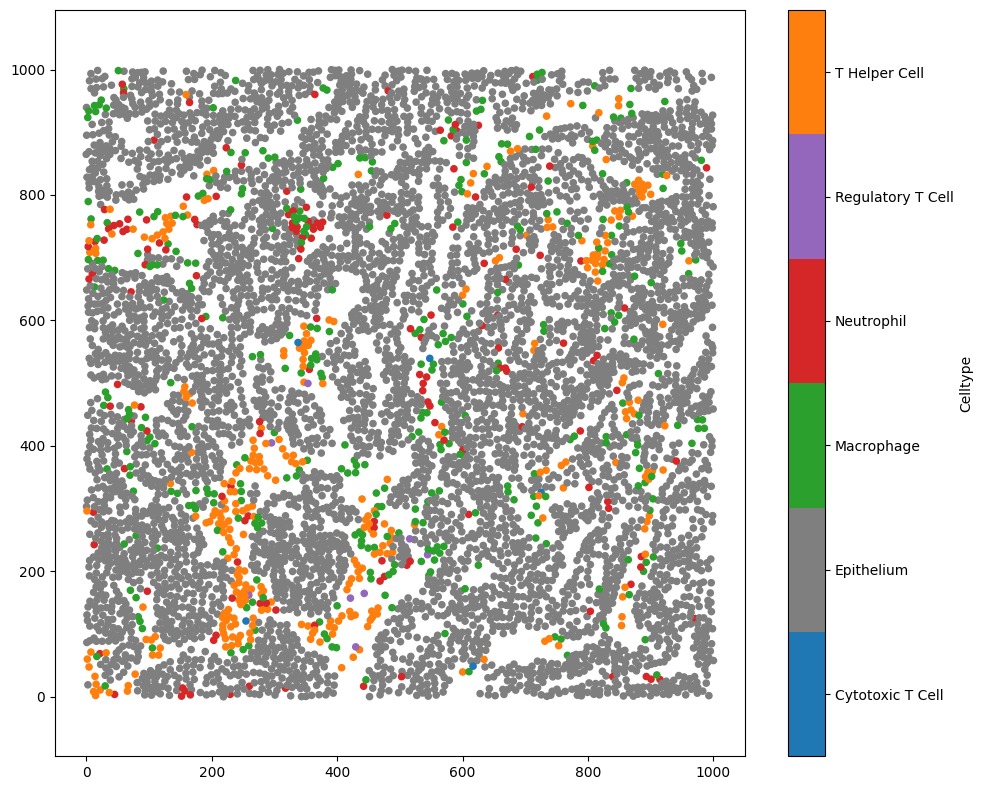

In [1]:
# Import the muspan library
import muspan as ms

# Load the example domain dataset
example_domain = ms.datasets.load_example_domain('Mouse-Colon-Carcinoma')

# Visualize the example domain, coloring by 'Celltype'
ms.visualise.visualise(example_domain, color_by='Celltype')

In this dataset, we have points representing cell centroids which are equipped with celltype labels. Using the `convert_objects` function in domain, we can take point-like data and convert into polygons approximating cell boundaries by using the `conversion_method='voronoi'` parameter.

In [2]:
# Convert point-like data into Voronoi polygons
example_domain.convert_objects(
    population=None,
    object_type='shape',
    conversion_method='voronoi',
    collection_name='Estimated boundaries',
    inherit_collections=False
)

As every point has a corresponding polygon, all the labels of the points are inherited in the conversion. In our case, this means that our shapes in 'Estimated boundaries' have the corresponding label 'Celltype'. Let's make sure this is the case by visualising our newly generated collection 'Estimated boundaries'.

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

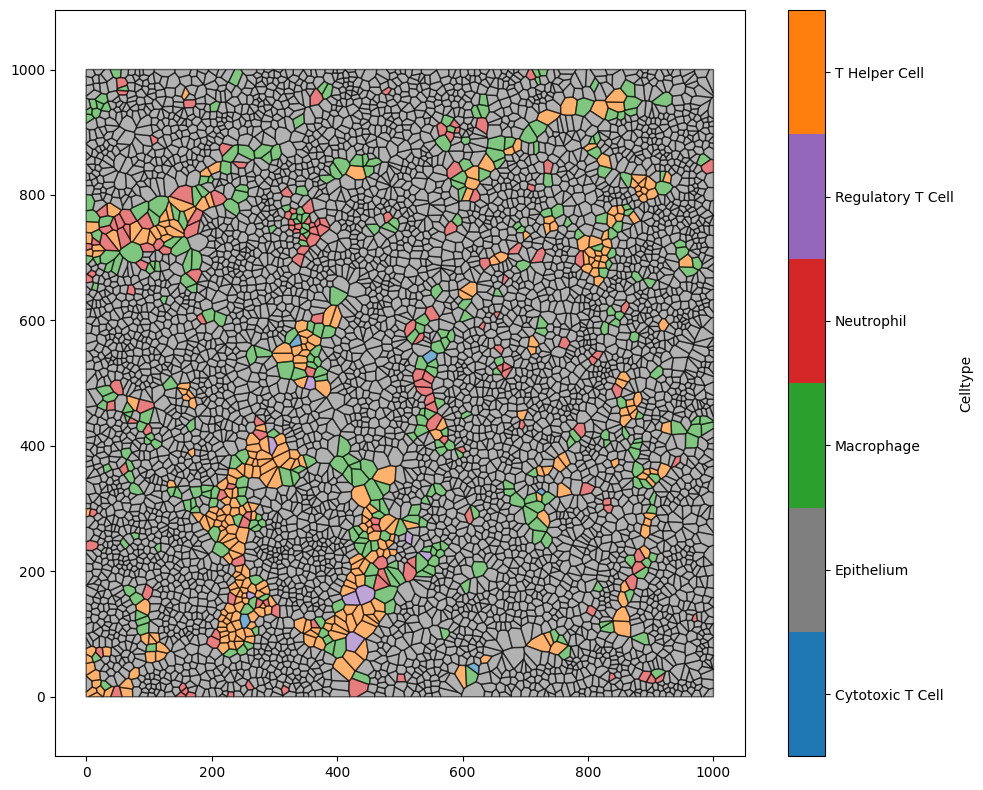

In [3]:
# Visualize the converted Voronoi polygons
ms.visualise.visualise(example_domain, color_by='Celltype', objects_to_plot=('collection', 'Estimated boundaries'))

Estimating shapes using Voronoi tessellation is useful as it provided an initutive representation of the planar cells. However, care should be taken if these are used in analysis as many voronoi tessellation has no restrictions on the size of the cells and form artefacts if voids are present in the data.